In [1]:
import pandas as pd
import numpy as np

# Clean Data

In [2]:
df = pd.read_csv('data/customer_churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
df.isna().sum()
# No null values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
df = df.drop(['area code', 'phone number', 'state'], axis=1)
# Drop unneeded columns

# EDA

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [7]:
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df.replace({False: 0, True: 1}, inplace=True)
# Change all data to numerical

In [8]:
df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


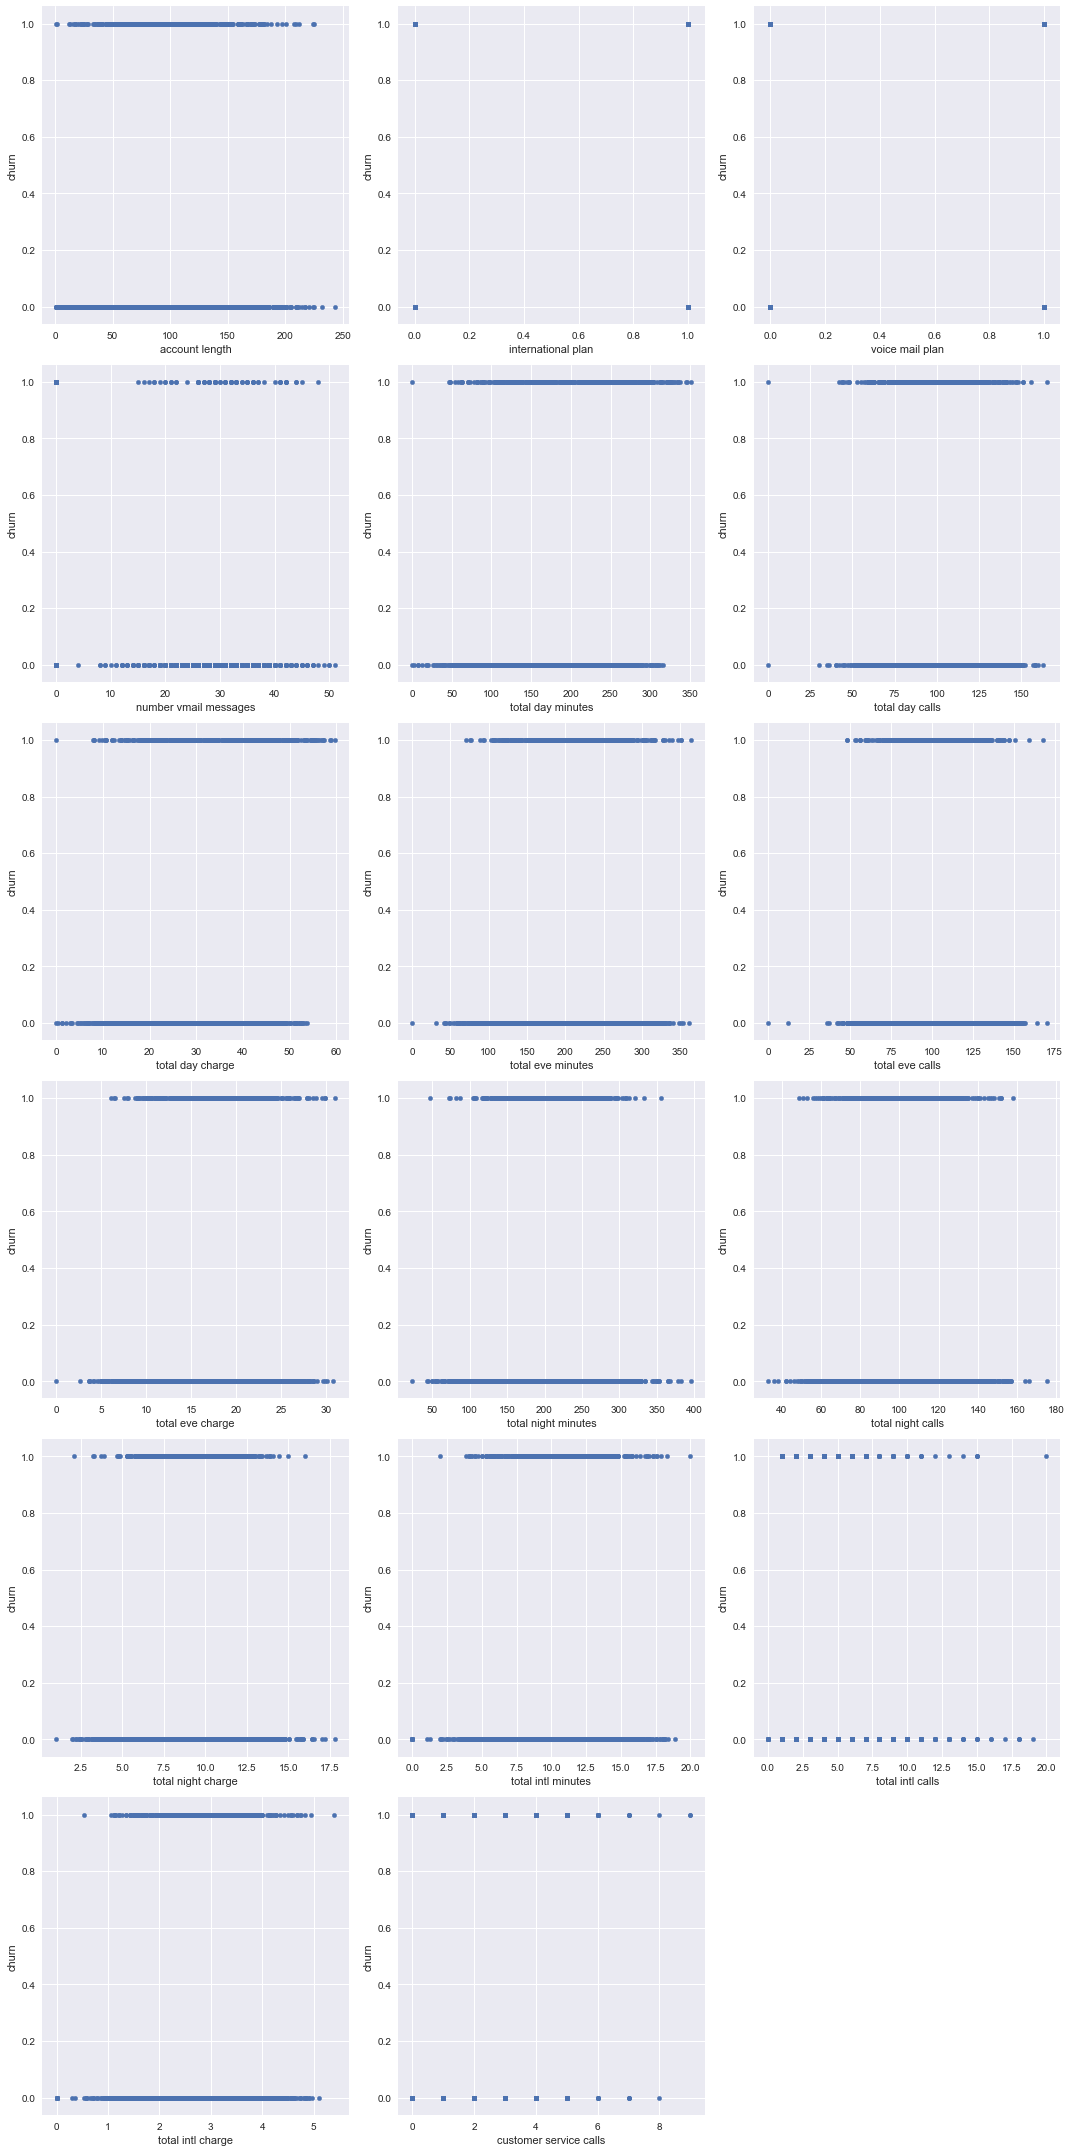

In [9]:
plt.figure(figsize=(15,30))
for i, col in enumerate(df.drop(['churn'], axis=1).columns):
    ax = plt.subplot(6, 3, i+1)
    df.plot.scatter(x=col, y='churn', ax=ax, legend=False)
plt.tight_layout()
plt.savefig(f'figures/scatter-plots.png')
plt.show()

In [10]:
df.corr()['churn'].sort_values(ascending=False)
# Corrolations to Churn

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

In [11]:
df_pairs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_pairs['Pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['Pairs'], inplace = True)
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['Correlation']
df_pairs.drop_duplicates(inplace=True)
df_pairs[(df_pairs.Correlation>.75) & (df_pairs.Correlation<1)]
# Checking correlation between columns

,Correlation
Pairs,
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night charge, total night minutes)",0.999999
"(total intl charge, total intl minutes)",0.999993
"(number vmail messages, voice mail plan)",0.956927


In [12]:
# Dropping unnecessary columns with high correlation
df = df.drop(['total day charge', 'total eve charge', 'total intl charge','total night charge', 'number vmail messages'], axis=1)

In [13]:
df_pairs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_pairs['Pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['Pairs'], inplace = True)
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['Correlation']
df_pairs.drop_duplicates(inplace=True)
df_pairs[(df_pairs.Correlation>.75) & (df_pairs.Correlation<1)]
# Checking correlation between columns

,Correlation
Pairs,


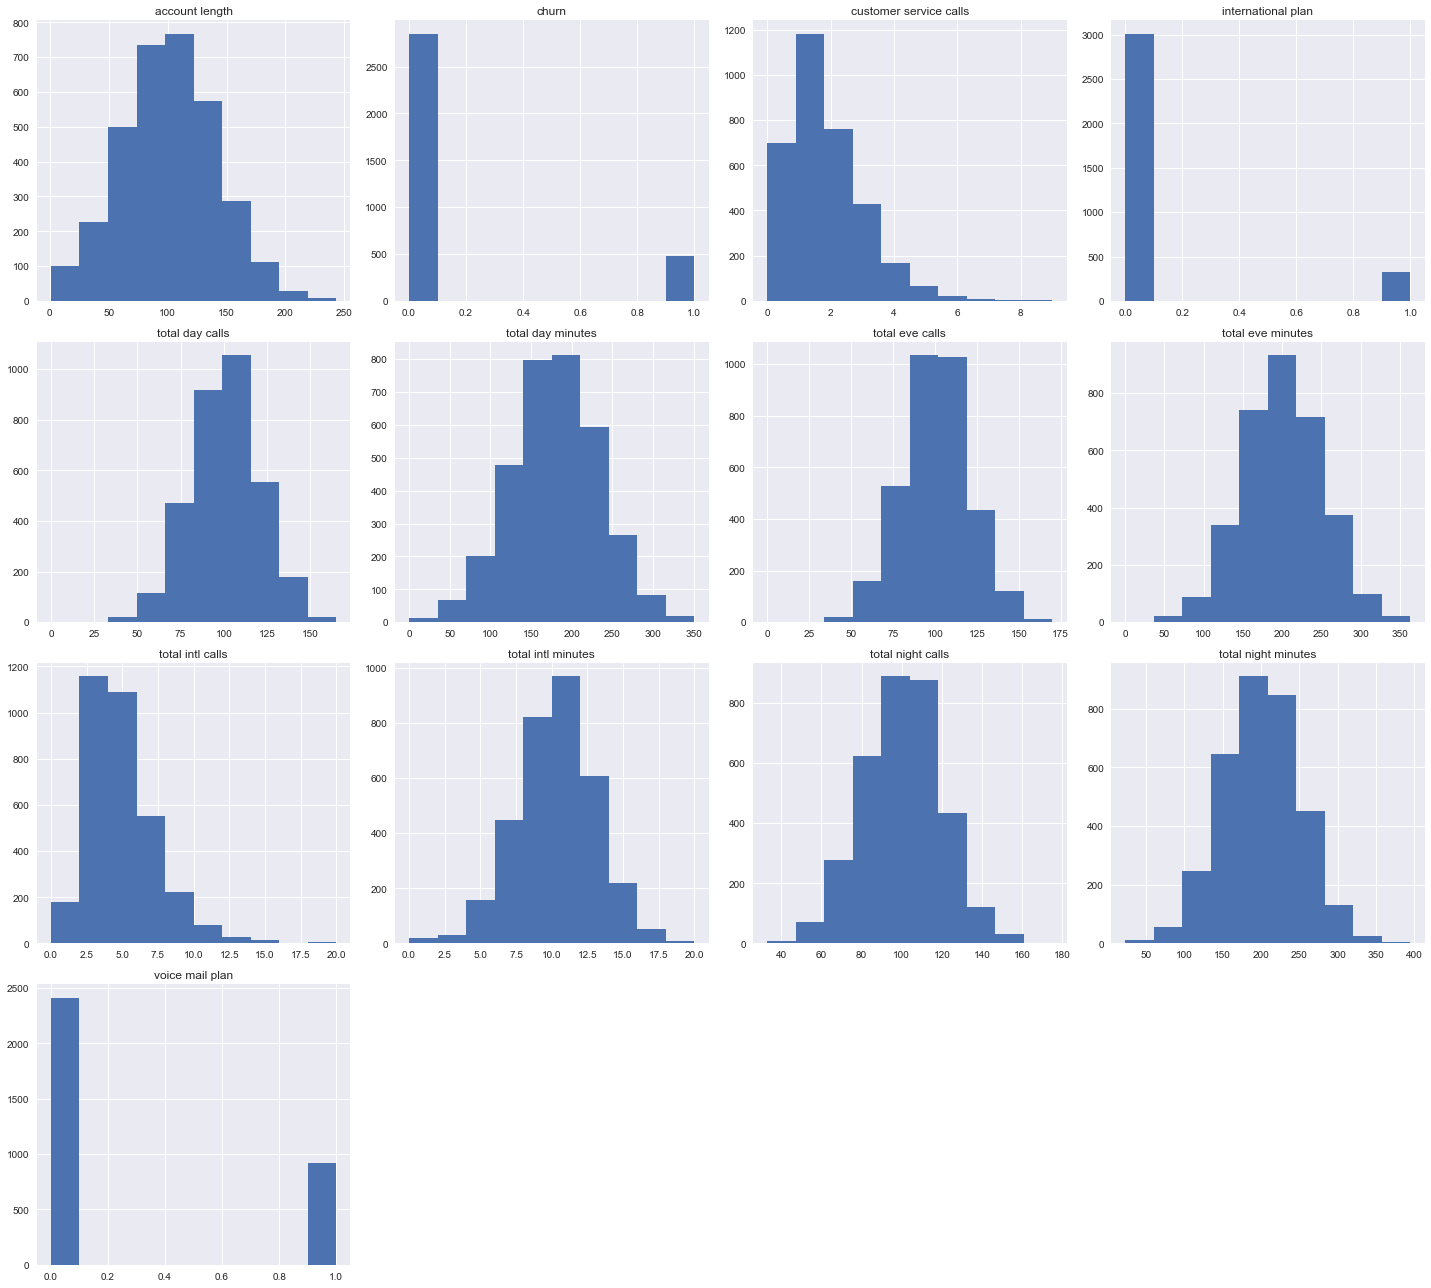

In [14]:
df.hist(figsize = (20,18))
plt.tight_layout()
plt.savefig(f'figures/histogram-plots.png')
plt.show()

Almost all categorical columns seem to have a normal distribution.

In [15]:
df.to_csv('data/cleaned_data.csv', index=False)